In [13]:
#import numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib, plotly and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats

from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
import pickle

%matplotlib inline

In [17]:
# function to calculate missing values percentage
nycbike = pd.read_csv('nyc_bikeshare.csv')

In [2]:

# bostonbike = pd.read_csv('dataset_2.csv')
# sfbike = pd.read_csv('dataset_3.csv')
# rideshare = pd.read_csv('dataset_4.csv')
# greenboro = pd.read_csv('dataset_5.csv')
# yellow = pd.read_csv('dataset_6.csv')
# subway = pd.read_csv('dataset_7.csv')
# demo = pd.read_csv('dataset_8.csv')
# geo = pd.read_csv('dataset_9.csv')
# loc = pd.read_csv('dataset_10.csv')
# weather = pd.read_csv('dataset_11.csv')

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [18]:
missing_values_table(nycbike)

This dataframe has 9 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
birthyear,1882643,6.9
usertype,15712,0.1
end_station_id,6231,0.0
start_station_id,815,0.0


In [23]:
nycbike.birthyear.median()

1981.0

In [24]:
# impute missing values several ways
# nycbike.gender.fillna(nycbike.gender.mode()[0],inplace=True)

nycbike.birthyear.fillna(nycbike.usertype.mode()[0],inplace=True)
nycbike.birthyear.fillna(nycbike.birthyear.median(),inplace=True)

nycbike_train=nycbike.dropna()
nycbike_train.head()


,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
0,2059,06-01-13 00:00:44,06-01-13 00:35:03,406.0,406.0,19599,0.0,1.0,0
1,1521,06-01-13 00:01:22,06-01-13 00:26:43,2008.0,310.0,15567,1.0,1983.0,1
2,2028,06-01-13 00:01:47,06-01-13 00:35:35,485.0,406.0,18445,0.0,1.0,0
3,1829,06-01-13 00:03:47,06-01-13 00:34:16,265.0,436.0,15234,1.0,1984.0,1
4,899,06-01-13 00:09:25,06-01-13 00:24:24,494.0,494.0,15539,1.0,1967.0,1


In [25]:
nycbike=nycbike_train.copy()

In [34]:
sum(nycbike_train.gender==0)/nycbike_train.shape[0]

0.10291194629519015

In [30]:
nycbike=nycbike[nycbike['gender']!=0]
nycbike.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
1,1521,06-01-13 00:01:22,06-01-13 00:26:43,2008.0,310.0,15567,1.0,1983.0,1
3,1829,06-01-13 00:03:47,06-01-13 00:34:16,265.0,436.0,15234,1.0,1984.0,1
4,899,06-01-13 00:09:25,06-01-13 00:24:24,494.0,494.0,15539,1.0,1967.0,1
5,395,06-01-13 00:11:52,06-01-13 00:18:27,312.0,410.0,19477,1.0,1970.0,1
6,424,06-01-13 00:11:53,06-01-13 00:18:57,494.0,519.0,18489,1.0,1957.0,1


In [31]:
nycbike.describe()

,tripduration,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
count,2.439487e+07,2.439487e+07,2.439487e+07,2.439487e+07,2.439487e+07,2.439487e+07,2.439487e+07
mean,8.529580e+02,1.192638e+03,1.183778e+03,2.384763e+04,9.676250e-01,1.978635e+03,1.248272e+00
std,1.059654e+04,1.296425e+03,1.293034e+03,6.717353e+03,1.769939e-01,1.413212e+01,4.320103e-01
min,6.000000e+01,7.200000e+01,7.200000e+01,1.453800e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.590000e+02,3.460000e+02,3.450000e+02,1.813500e+04,1.000000e+00,1.970000e+03,1.000000e+00
50%,5.840000e+02,4.720000e+02,4.700000e+02,2.222600e+04,1.000000e+00,1.981000e+03,1.000000e+00
75%,9.720000e+02,3.066000e+03,3.055000e+03,2.894800e+04,1.000000e+00,1.988000e+03,1.000000e+00
max,1.502093e+07,3.908000e+03,3.908000e+03,4.204600e+04,1.000000e+00,2.003000e+03,2.000000e+00


In [66]:
male=sum(nycbike.gender[nycbike.gender==1])

In [68]:
female=sum(nycbike.gender[nycbike.gender==2])

In [69]:
male/female

1.513922433805615

In [35]:


nycbike['age']=2020-nycbike['birthyear']
nycbike["startdate"] = nycbike.starttime.apply(lambda x : x.split()[0])
nycbike["starthour"] = nycbike.starttime.apply(lambda x : x.split()[1].split(":")[0])
nycbike["weekday"] = nycbike.startdate.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m-%d-%y").weekday()])

nycbike["month"] = nycbike.startdate.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m-%d-%y").month])
continuous_col=[i for i in nycbike.columns if i in ['tripduration','age','startdate','starthour','start_station_id','end_station_id']]
discrete_col=[i for i in nycbike.columns if i in ['usertype','weekday']]



In [221]:
nycbike.startdate=pd.to_datetime(nycbike.startdate,format="%m-%d-%y")

In [222]:
female_nyc=nycbike[nycbike['gender']==2]
male_nyc=nycbike[nycbike['gender']==1]

In [46]:
female=female_nyc
male=male_nyc

In [226]:

#function for pie plot for catogorical features
def plot_pie(column,year) :
    
    trace1 = go.Pie(values  = female_nyc[female_nyc.startdate.dt.year==year][column].value_counts().values.tolist(),
                    labels  = female_nyc[female_nyc.startdate.dt.year==year][column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "female User",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = male_nyc[male_nyc.startdate.dt.year==year][column].value_counts().values.tolist(),
                    labels  = male_nyc[male_nyc.startdate.dt.year==year][column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "male User" 
                   )


    layout = go.Layout(dict(title = column + " distribution in Userbehavior in "+ str(year),
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Famle User",
                                                font = dict(size = 13),
                                                showarrow = False,
                                               x = .15, y = .5),
                                           dict(text = "Male User",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                      
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

for year in range(2013,2020,1):
    for i in discrete_col:
        plot_pie(i,year)
        

In [ ]:
pickle_out = open("nyc_bike.pickle","wb")
pickle.dump(nycbike, pickle_out)
pickle_out.close()


In [227]:
continuous_col=[i for i in nycbike.columns if i in ['tripduration','starthour','start_station_id']]



In [356]:
female_nyc[female_nyc.startdate.dt.year==201]['tripduration'].describe()

count    1.107781e+06
mean     1.024398e+03
std      1.928469e+04
min      6.100000e+01
25%      4.040000e+02
50%      6.600000e+02
75%      1.099000e+03
max      9.254340e+06
Name: tripduration, dtype: float64

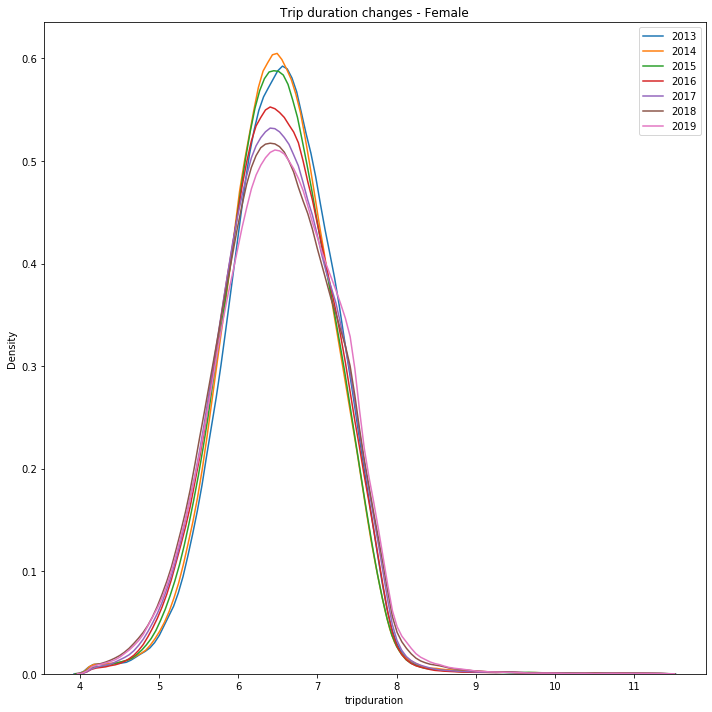

In [364]:
# plot numeric data
plt.figure(figsize = (10,10))

# iterate through the continuous_col

for i,year in enumerate(range(0,25,1)):
    # create a new subplot for each source
    sns.kdeplot(np.log(female_nyc[(female_nyc.startdate.dt.year==year)&(female_nyc.tripduration<=86400)]['tripduration']), label = str(year))

    # Label the plots
    plt.title('Trip duration changes - Female')
    plt.xlabel('tripduration'); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)


#### plot numeric data
plt.figure(figsize = (12, 100))

# iterate through the continuous_col
j=0
for year in range(2013,2020,1):
    
    for i, source in enumerate(continuous_col):

        # create a new subplot for each source
        plt.subplot(23, 1, i+j+ 1)

        sns.kdeplot(male_nyc[male_nyc.startdate.dt.year==year][source], label = 'male')

        sns.kdeplot(female_nyc[female_nyc.startdate.dt.year==year][source], label = 'female')

        # Label the plots
        plt.title('Distribution of %s by gender' % source +str(year))
        plt.xlabel('%s' % source); plt.ylabel('Density');

        j+=1
plt.tight_layout(h_pad = 2.5)


In [78]:
female_nyc.tripduration[female_nyc['tripduration']=0]

Series([], Name: tripduration, dtype: int64)

In [75]:
male_nyc.tripduration[male_nyc.tripduration!=0].mode()

0    341
dtype: int64

In [85]:
female_nyc['tripduration'].describe()

count    6.056556e+06
mean     9.740138e+02
std      1.314874e+04
min      6.000000e+01
25%      4.110000e+02
50%      6.670000e+02
75%      1.101000e+03
max      1.502093e+07
Name: tripduration, dtype: float64

In [100]:
female_nyc['starthour']=pd.to_numeric(female_nyc['starthour'])
male_nyc['starthour']=pd.to_numeric(male_nyc['starthour'])


In [120]:
nycbike['starthour']=pd.to_numeric(nycbike['starthour'])


In [138]:
morning_peak_female=female_nyc[(female_nyc['starthour']>=7)&(female_nyc['starthour']<=10)]
morning_peak_male=male_nyc[(male_nyc['starthour']>=7)&(male_nyc['starthour']<=10)]
morning_peak_total=nycbike[(nycbike['starthour']>=7) & (nycbike['starthour']<=10)]
afternoon_peak_female=female_nyc[(female_nyc['starthour']>=17 )& (female_nyc['starthour']<=20)]
afternoon_peak_male=male_nyc[(male_nyc['starthour']>=17) & (male_nyc['starthour']<=20)]
afternoon_peak_total=nycbike[(nycbike['starthour']>=17) & (nycbike['starthour']<=20)]
night_female=female_nyc[(female_nyc['starthour']>=21) | (female_nyc['starthour']<=3)]
night_male=male_nyc[(male_nyc['starthour']>=21) | (male_nyc['starthour']<=3)]
night_total=nycbike[(nycbike['starthour']>=21) | (nycbike['starthour']<=3)]


In [139]:
continuous_col=[i for i in nycbike.columns if i in ['tripduration','start_station_id','end_station_id']]


In [207]:
night_female.startdate=pd.to_datetime(night_female.startdate,format="%m-%d-%y")


In [212]:
night_male.startdate=pd.to_datetime(night_male.startdate,format="%m-%d-%y")
night_total.startdate=pd.to_datetime(night_total.startdate,format="%m-%d-%y")
morning_peak_female.startdate=pd.to_datetime(morning_peak_female.startdate,format="%m-%d-%y")
morning_peak_male.startdate=pd.to_datetime(morning_peak_male.startdate,format="%m-%d-%y")
morning_peak_total.startdate=pd.to_datetime(morning_peak_total.startdate,format="%m-%d-%y")
afternoon_peak_female.startdate=pd.to_datetime(afternoon_peak_female.startdate,format="%m-%d-%y")
afternoon_peak_male.startdate=pd.to_datetime(afternoon_peak_male.startdate,format="%m-%d-%y")
afternoon_peak_total.startdate=pd.to_datetime(afternoon_peak_total.startdate,format="%m-%d-%y")


In [ ]:
night_male[]

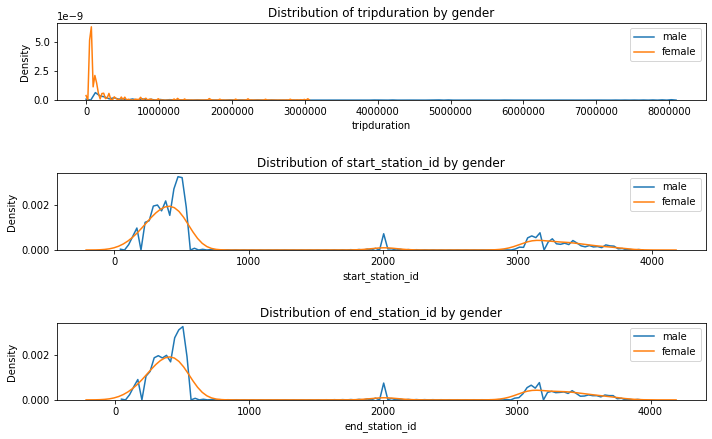

In [141]:
plt.figure(figsize = (10, 12))

# iterate through the continuous_col
for i, source in enumerate(continuous_col):
    
    # create a new subplot for each source
    plt.subplot(6, 1, i + 1)

    sns.kdeplot(night_male.[source], label = 'male')
  
    sns.kdeplot(night_female[source], label = 'female')
    
    # Label the plots
    plt.title('Distribution of %s by gender' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)


(array([7.89604215, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.10395785]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

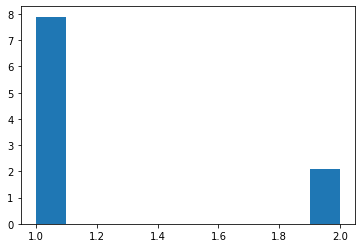

In [148]:
plt.hist(night_total.gender,density=True)

In [213]:
len(night_female[night_female.startdate.dt.year==2019])/len(night_male[night_male.startdate.dt.year==2019])

0.27718041927460574

In [214]:
len(morning_peak_female[morning_peak_female.startdate.dt.year==2019])/len(morning_peak_male[morning_peak_male.startdate.dt.year==2019])

0.3700467393389615

In [215]:
len(afternoon_peak_female[afternoon_peak_female.startdate.dt.year==2019])/len(afternoon_peak_male[afternoon_peak_male.startdate.dt.year==2019])

0.3420122790366093

In [216]:
nightratio=[]
morningratio=[]
afternoonratio=[]



for year in range(2013,2020,1):
    nightratio.append(len(night_female[night_female.startdate.dt.year==year])/len(night_male[night_male.startdate.dt.year==year]))
    morningratio.append(len(morning_peak_female[morning_peak_female.startdate.dt.year==year])/len(morning_peak_male[morning_peak_male.startdate.dt.year==year]))
    afternoonratio.append(len(afternoon_peak_female[afternoon_peak_female.startdate.dt.year==year])/len(afternoon_peak_male[afternoon_peak_male.startdate.dt.year==year]))

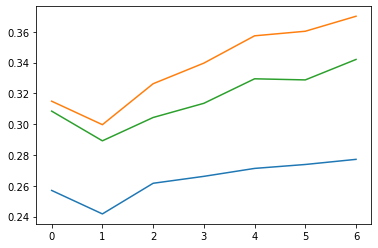

In [220]:
plt.plot(nightratio)
plt.plot(morningratio)
plt.plot(afternoonratio)
plt.show()

In [241]:
high_frequency=nycbike[nycbike.startdate.dt.year==2019].start_station_id.value_counts()

In [251]:
high_frequency[:100,].keys()

Float64Index([ 519.0,  497.0, 3255.0,  402.0,  285.0,  435.0,  358.0,  426.0,
               499.0,  490.0,  459.0,  293.0,  514.0,  477.0,  379.0, 3641.0,
               523.0, 3711.0,  359.0,  491.0,  465.0,  504.0,  492.0,  151.0,
              3263.0,  168.0, 3435.0, 3002.0,  229.0,  368.0,  446.0,  505.0,
               432.0,  462.0, 3664.0,  486.0,  445.0,  468.0,  472.0,  442.0,
               327.0,  173.0,  496.0,  128.0,  453.0,  494.0,  458.0,  438.0,
              3687.0,  297.0,  461.0,  482.0,  517.0, 3141.0,  525.0,  405.0,
               281.0, 3233.0,  507.0,  312.0,  466.0, 3164.0,  518.0,  380.0,
               307.0,  127.0, 3686.0,  545.0,  479.0,  528.0, 3707.0, 2006.0,
               326.0, 2003.0,  347.0,  334.0,  474.0, 3443.0,  439.0,  223.0,
               501.0,  284.0,  478.0,  236.0, 3256.0,  476.0,  237.0,  487.0,
              3260.0,  503.0,  450.0,  301.0, 3656.0,  317.0,  350.0,  531.0,
               161.0, 3167.0,  251.0,  530.0],
             dtyp

In [388]:
ratio=[]
for year in range(2013,2020,1):
    ratio.append(sum(nycbike[nycbike.startdate.dt.year==year]['gender']==2)/sum(nycbike[nycbike.startdate.dt.year==year]['gender']==1))

Text(0.5, 1.0, 'Gender ratio change')

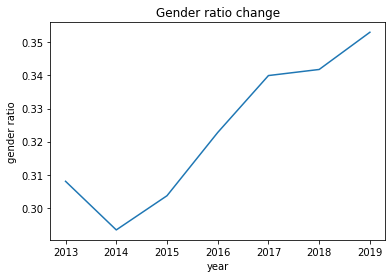

In [396]:
plt.plot(ratio)
plt.xticks(np.arange(7), ('2013', '2014', '2015', '2016', '2017','2018','2019'))
plt.xlabel('year')
plt.ylabel('gender ratio')
plt.title('Gender ratio change')

In [313]:
female_2019=female_nyc[(female_nyc.startdate.dt.year==2019)& (female_nyc.weekday !='Saturday') & (female_nyc.weekday!='Sunday')]
male_2019=male_nyc[(male_nyc.startdate.dt.year==2019)& (male_nyc.weekday!='Saturday') & (male_nyc.weekday!='Sunday')]

In [314]:
female_2019

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,age,startdate,starthour,weekday,month
21462134,300,01-01-19 00:12:17,01-01-19 00:17:18,3394.0,3398.0,18636,1.0,1990.0,2,30.0,2019-01-01,0,Tuesday,January
21462136,209,01-01-19 00:15:09,01-01-19 00:18:39,438.0,301.0,34416,1.0,1998.0,2,22.0,2019-01-01,0,Tuesday,January
21462142,377,01-01-19 00:23:26,01-01-19 00:29:43,435.0,509.0,32313,1.0,1968.0,2,52.0,2019-01-01,0,Tuesday,January
21462146,788,01-01-19 00:27:32,01-01-19 00:40:40,534.0,327.0,28961,0.0,1984.0,2,36.0,2019-01-01,0,Tuesday,January
21462147,716,01-01-19 00:28:42,01-01-19 00:40:39,3165.0,450.0,28774,1.0,1972.0,2,48.0,2019-01-01,0,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27207583,2610,11-29-19 23:49:13,11-30-19 00:32:43,508.0,3016.0,32225,1.0,1986.0,2,34.0,2019-11-29,23,Friday,November
27207593,701,11-29-19 23:54:56,11-30-19 00:06:38,3118.0,3130.0,40370,1.0,1996.0,2,24.0,2019-11-29,23,Friday,November
27207594,500,11-29-19 23:54:58,11-30-19 00:03:18,360.0,360.0,27558,1.0,1992.0,2,28.0,2019-11-29,23,Friday,November
27207595,185,11-29-19 23:56:21,11-29-19 23:59:27,119.0,245.0,29025,1.0,1938.0,2,82.0,2019-11-29,23,Friday,November


In [315]:
s1=female_2019.groupby('start_station_id').count()['gender']

In [316]:
s2=male_2019.groupby('start_station_id').count()['gender']

In [317]:
ratio_table=pd.DataFrame([s1/s2]).T


In [318]:
ratio_table.describe()

,gender
count,906.000000
mean,0.391377
std,0.163121
min,0.090909
25%,0.304593
50%,0.372562
75%,0.453883
max,2.000000


,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,age,startdate,starthour,weekday,month
21462134,300,01-01-19 00:12:17,01-01-19 00:17:18,3394.0,3398.0,18636,1.0,1990.0,2,30.0,2019-01-01,0,Tuesday,January
21462136,209,01-01-19 00:15:09,01-01-19 00:18:39,438.0,301.0,34416,1.0,1998.0,2,22.0,2019-01-01,0,Tuesday,January
21462142,377,01-01-19 00:23:26,01-01-19 00:29:43,435.0,509.0,32313,1.0,1968.0,2,52.0,2019-01-01,0,Tuesday,January
21462146,788,01-01-19 00:27:32,01-01-19 00:40:40,534.0,327.0,28961,0.0,1984.0,2,36.0,2019-01-01,0,Tuesday,January
21462147,716,01-01-19 00:28:42,01-01-19 00:40:39,3165.0,450.0,28774,1.0,1972.0,2,48.0,2019-01-01,0,Tuesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27215318,223,11-30-19 23:53:24,11-30-19 23:57:07,285.0,223.0,34015,1.0,1966.0,2,54.0,2019-11-30,23,Saturday,November
27215321,921,11-30-19 23:54:24,12-01-19 00:09:46,499.0,3156.0,32950,1.0,1963.0,2,57.0,2019-11-30,23,Saturday,November
27215325,671,11-30-19 23:55:35,12-01-19 00:06:46,3307.0,3320.0,40369,1.0,1966.0,2,54.0,2019-11-30,23,Saturday,November
27215333,192,11-30-19 23:58:49,12-01-19 00:02:01,503.0,297.0,15543,1.0,1966.0,2,54.0,2019-11-30,23,Saturday,November


In [319]:
ratio_table

,gender
start_station_id,
72.0,0.299042
79.0,0.327822
82.0,0.525614
83.0,0.336489
116.0,0.311392
...,...
3899.0,0.285714
3900.0,1.500000
3901.0,NaN


In [320]:
s3=male_2019.groupby(['start_station_id','starthour']).count()['gender']


In [321]:
s4=female_2019.groupby(['start_station_id','starthour']).count()['gender']

In [330]:
ratio_table2=pd.DataFrame([s4/s3]).T

In [331]:
ratio_table2.columns=['gender ratio']

In [324]:
s3[72]

starthour
0      46
1      30
2      19
3       5
4      19
5      54
6     118
7     422
8     877
9     686
10    257
11    251
12    270
13    312
14    293
15    366
16    404
17    551
18    694
19    436
20    249
21    163
22    162
23    101
Name: gender, dtype: int64

In [300]:
s4[72]

starthour
0       7
1      12
2      10
3      15
4      10
5      11
6      34
7     121
8     323
9     243
10    154
11    167
12    155
13    165
14    170
15    178
16    190
17    257
18    282
19    136
20     78
21     42
22     32
23     26
Name: gender, dtype: int64

In [327]:
ratio_table2.to_csv('ratio_station_starthour_onlyweekday.csv')

In [333]:
ratio_table2.fillna(0,inplace=True)

In [335]:
ratio_table2.to_csv('ratio_station_starthour_onlyweekday.csv')

In [368]:
new=ratio_table2.unstack().fillna(0)

gender ratio                                               \
starthour                  0         1         2    3         4         5    
start_station_id                                                             
72.0                 0.065217  0.266667  0.473684  1.4  0.105263  0.166667   
79.0                 0.129032  0.307692  0.200000  0.0  0.000000  0.111111   
82.0                 0.375000  0.200000  0.600000  0.0  0.000000  0.111111   
83.0                 0.476190  0.083333  0.000000  0.0  0.333333  0.333333   
116.0                0.145161  0.060000  0.038462  0.0  0.272727  0.179487   
...                       ...       ...       ...  ...       ...       ...   
3899.0               0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3900.0               0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3901.0               0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3903.0               0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
3908.0               0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

                                                          ...            \
starthour               6         7         8         9   ...        14   
start_station_id                                          ...             
72.0              0.262712  0.270142  0.343216  0.298834  ...  0.300341   
79.0              0.477273  0.261905  0.267267  0.340824  ...  0.285714   
82.0              1.730769  0.673684  0.906040  0.428571  ...  1.087500   
83.0              0.076923  0.589744  0.274194  0.339806  ...  0.533333   
116.0             0.270440  0.511111  0.361619  0.429477  ...  0.298851   
...                    ...       ...       ...       ...  ...       ...   
3899.0            0.000000  0.000000  1.000000  0.000000  ...  0.000000   
3900.0            0.000000  0.000000  0.000000  0.000000  ...  0.000000   
3901.0            0.000000  0.000000  0.000000  0.000000  ...  0.000000   
3903.0            0.000000  0.000000  0.000000  0.000000  ...  0.000000   
3908.0            0.000000  0.000000  0.000000  0.000000  ...  0.000000   

                                                                              \
starthour               15        16        17        18        19        20   
start_station_id                                                               
72.0              0.251366  0.311881  0.352087  0.319885  0.231651  0.228916   
79.0              0.314554  0.359073  0.288032  0.325623  0.420168  0.328767   
82.0              0.893617  0.658537  0.515464  0.299020  0.278571  0.230000   
83.0              0.271523  0.320261  0.326203  0.374532  0.380000  0.333333   
116.0             0.336043  0.252788  0.242558  0.278068  0.273551  0.337875   
...                    ...       ...       ...       ...       ...       ...   
3899.0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3900.0            1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3901.0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3903.0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3908.0            1.000000  1.000000  0.000000  0.000000  0.000000  0.000000   

                                                
starthour               21        22        23  
start_station_id                                
72.0              0.190184  0.141975  0.148515  
79.0              0.327381  0.264000  0.300000  
82.0              0.125000  0.170213  0.230769  
83.0              0.313333  0.322148  0.356164  
116.0             0.252066  0.302083  0.243902  
...                    ...       ...       ...  
3899.0            0.000000  0.000000  0.000000  
3900.0            0.000000  0.000000  0.000000  
3901.0            0.000000  0.000000  0.000000  
3903.0            0.000000  0.000000  0.000000  
3908.0            0.000000  0.000000  0.000000  

[918 rows x 24 columns]

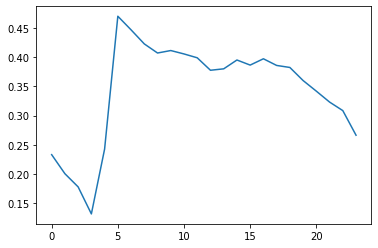

In [386]:
plt.plot(new.values.T.mean(axis=1))
